In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import *
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.decomposition import *
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from pathlib import Path
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from util import *
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
#Pull data form Tomes Google drive
data_link = {
    '35x35': 'SOM_clusters/codes_35_35.txt',
    '48x48': 'SOM_clusters/codes_48_48.txt'
}

In [3]:
# Compute different clusters on all the data
clusterings_all = {}
silhouette_scores_all = {}
per_cluester_silhouette_scores_all = {}
for typ, link in data_link.items():
    df = pd.read_csv(link, sep="\t").to_numpy()
    clusteringsi, _, silhouette_scoresi, per_cluster_silhi = compute_clusters(df, prefix=typ)
    clusterings_all = {**clusterings_all, **clusteringsi}
    silhouette_scores_all = {**silhouette_scores_all, **silhouette_scoresi}
    per_cluester_silhouette_scores_all = {**per_cluester_silhouette_scores_all, **per_cluster_silhi}

In [4]:
# Save them to csv files
Path("clusters").mkdir(parents=True, exist_ok=True)
for k, v in clusterings_all.items():
    np.savetxt(f"clusters/{k}.csv", v.astype(int), fmt='%i', delimiter=",")

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


NameError: name 'som_map_size' is not defined

<Figure size 1080x1080 with 0 Axes>

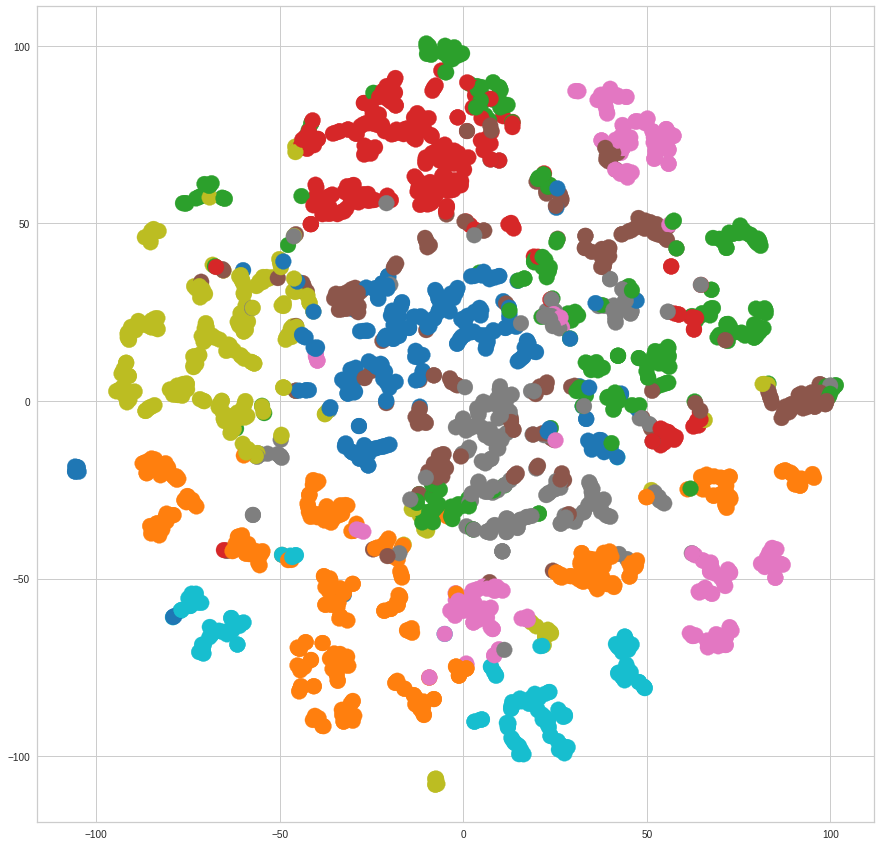

In [5]:
number_of_clusters=6
distance_matrix = pairwise_distances(df, df, metric='cosine')
embedding_algorithm = TSNE(n_components=2, random_state=0, perplexity=5, metric="precomputed")
X_2d = embedding_algorithm.fit_transform(distance_matrix)
model = AgglomerativeClustering(n_clusters=number_of_clusters, affinity='cosine', linkage='average').fit(df)

length = np.sqrt((df**2).sum(axis=1))[:,None]
X = df / length
model = KMeans(n_clusters=9, random_state=0).fit(X)

figshape=15,15
plt.figure(figsize=figshape)
fig, ax = plt.subplots()
fig.set_size_inches(figshape, forward=True)
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=model.labels_, cmap='tab10', s=250)

TSNE_FIGURE_PATH = f'{som_map_size}_tsne_{number_of_clusters}_clusters.pdf'
plt.savefig(TSNE_FIGURE_PATH, bbox_inches='tight', pad_inches=0)